In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import timedelta
import eda

## 외국인 카드 매출

## Data Load

In [2]:
fore = pd.read_csv('../data/02_Shinhan_Card/shinhan_dataset(외국인).txt', sep='\t',
                   encoding='cp949')
print(fore.shape)
fore.head()

(238829, 7)


,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0


## Data Processing

In [3]:
fore = eda.card_preprocessing(fore)
fore.rename(columns={'STD_DD':'STD_YMD', 'DONG_NM':'HDONG_NM'}, inplace=True)
fore = fore.set_index('STD_YMD')

## 결측값 처리

### USE_AMT 결측값 처리

In [4]:
fore.query('HDONG_NM == "회현동" and COUNTRY_NM == "대만" and UP_NM == "유통업" and USE_CNT == 1') \
    .query('USE_AMT < 400')['USE_AMT'].mean()

58.36

In [5]:
fore[fore['USE_AMT'].isnull() & fore['USE_CNT'] == 1] = \
fore[fore['USE_AMT'].isnull() & fore['USE_CNT'] == 1].fillna(58)

In [6]:
fore.query('HDONG_NM == "회현동" and COUNTRY_NM == "대만" and UP_NM == "유통업" and 3 <= USE_CNT <= 9').sort_values(by='STD_YMD').head()

,GU_NM,HDONG_NM,UP_NM,COUNTRY_NM,USE_CNT,USE_AMT
STD_YMD,,,,,,
2020-02-25,서울 중구,회현동,유통업,대만,8,758.0
2020-02-26,서울 중구,회현동,유통업,대만,3,161.0
2020-02-29,서울 중구,회현동,유통업,대만,5,135.0
2020-03-02,서울 중구,회현동,유통업,대만,4,696.0
2020-03-06,서울 중구,회현동,유통업,대만,5,676.0


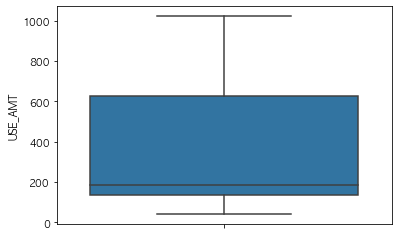

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='USE_AMT', data=fore.query('HDONG_NM == "회현동" and COUNTRY_NM == "대만" and UP_NM == "유통업" and 3 <= USE_CNT <= 9'))
plt.show()

In [8]:
fore[fore['USE_AMT'].isnull()] = fore[fore['USE_AMT'].isnull()].fillna(365)

### COUNTRY_NM열 결측값 처리

In [9]:
round(fore.query('COUNTRY_NM == "정보없음"').shape[0] / fore.shape[0], 4)

0.0029

In [10]:
round (fore.query('COUNTRY_NM == "정보없음"')['USE_AMT'].sum() / fore['USE_AMT'].sum(), 4)

0.0001

In [11]:
unknown_index = fore.query('COUNTRY_NM == "정보없음"').index
fore.drop(unknown_index, inplace=True)

In [12]:
## 내국인 카드 매출
resid = pd.read_csv('../data/02_Shinhan_Card/shinhan_dataset(내국인).txt', sep='\t')
resid = eda.card_preprocessing(resid)
resid.rename(columns={'STD_DD':'STD_YMD', 'DONG_NM':'HDONG_NM'}, inplace=True)
print(resid.shape)
resid.head()

(2537753, 8)


,STD_YMD,GU_NM,HDONG_NM,UP_NM,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,2019-02-01,대구 중구,동인동,숙박,F,25,11,595
1,2019-02-01,대구 중구,동인동,숙박,F,50,5,243
2,2019-02-01,대구 중구,동인동,숙박,F,55,5,27
3,2019-02-01,대구 중구,동인동,숙박,M,20,11,243
4,2019-02-01,대구 중구,동인동,숙박,M,25,11,433


### 행정동별 외국인 이용금액 차지 비중

In [13]:
fore.groupby('HDONG_NM')['USE_AMT'].sum() / resid.groupby('HDONG_NM')['USE_AMT'].sum().sort_values()

HDONG_NM
고산1동    0.000062
고산2동    0.000060
고산3동    0.000044
공릉1동    0.000207
공릉2동    0.000233
          ...   
하계2동    0.000055
황금1동    0.000147
황금2동    0.000192
황학동     0.001764
회현동     0.016059
Name: USE_AMT, Length: 69, dtype: float64

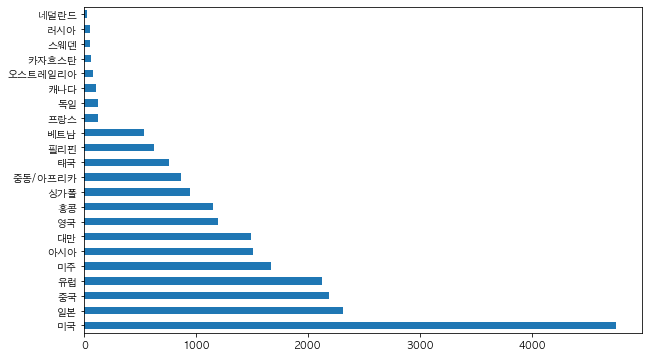

In [14]:
plt.figure(figsize=(10, 6))
fore['COUNTRY_NM'].value_counts().plot.barh()
plt.show()

## Data Load

In [15]:
resid = pd.read_csv('../data/02_Shinhan_Card/shinhan_dataset(내국인).txt', sep='\t')

## Data Processing

In [16]:
resid = eda.card_preprocessing(resid)
resid.rename(columns={'STD_DD':'STD_YMD', 'DONG_NM':'HDONG_NM'}, inplace=True)
print(resid.shape)
resid.head()

(2537753, 8)


,STD_YMD,GU_NM,HDONG_NM,UP_NM,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,2019-02-01,대구 중구,동인동,숙박,F,25,11,595
1,2019-02-01,대구 중구,동인동,숙박,F,50,5,243
2,2019-02-01,대구 중구,동인동,숙박,F,55,5,27
3,2019-02-01,대구 중구,동인동,숙박,M,20,11,243
4,2019-02-01,대구 중구,동인동,숙박,M,25,11,433


## 내국인 연령에 따른 2019, 2020년 건수

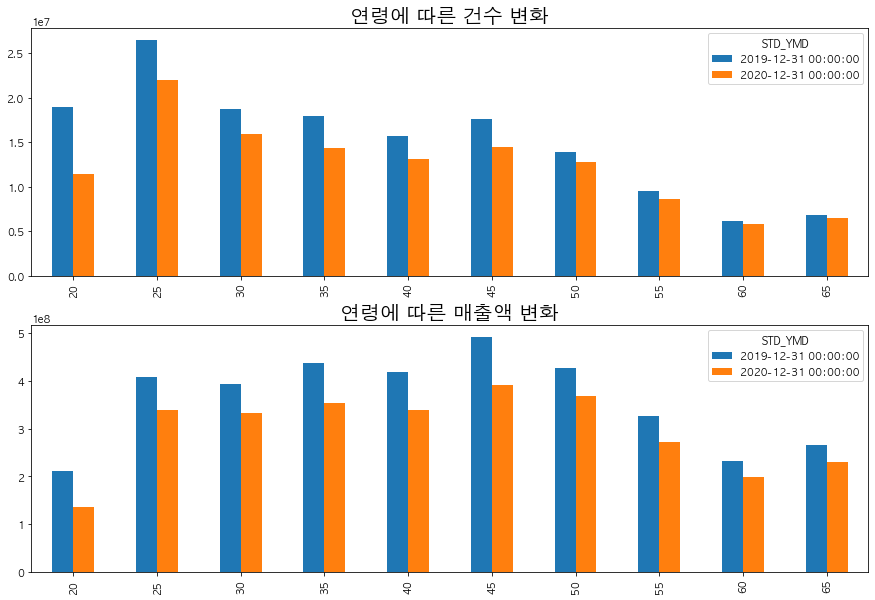

In [17]:
fig, ax = plt.subplots(2, 1, figsize = (15,10))
resid.set_index('STD_YMD').groupby([pd.Grouper(freq='Y'), 'AGE_CD'])['USE_CNT'].sum()\
.unstack('AGE_CD').T.plot.bar(ax= ax[0])
ax[0].set_title('연령에 따른 건수 변화', fontsize = 20)
ax[0].set_xlabel('')

resid.set_index('STD_YMD').groupby([pd.Grouper(freq='Y'), 'AGE_CD'])['USE_AMT'].sum()\
.unstack('AGE_CD').T.plot.bar(ax = ax[1])
ax[1].set_title('연령에 따른 매출액 변화', fontsize = 20)
ax[1].set_xlabel('')

plt.show()

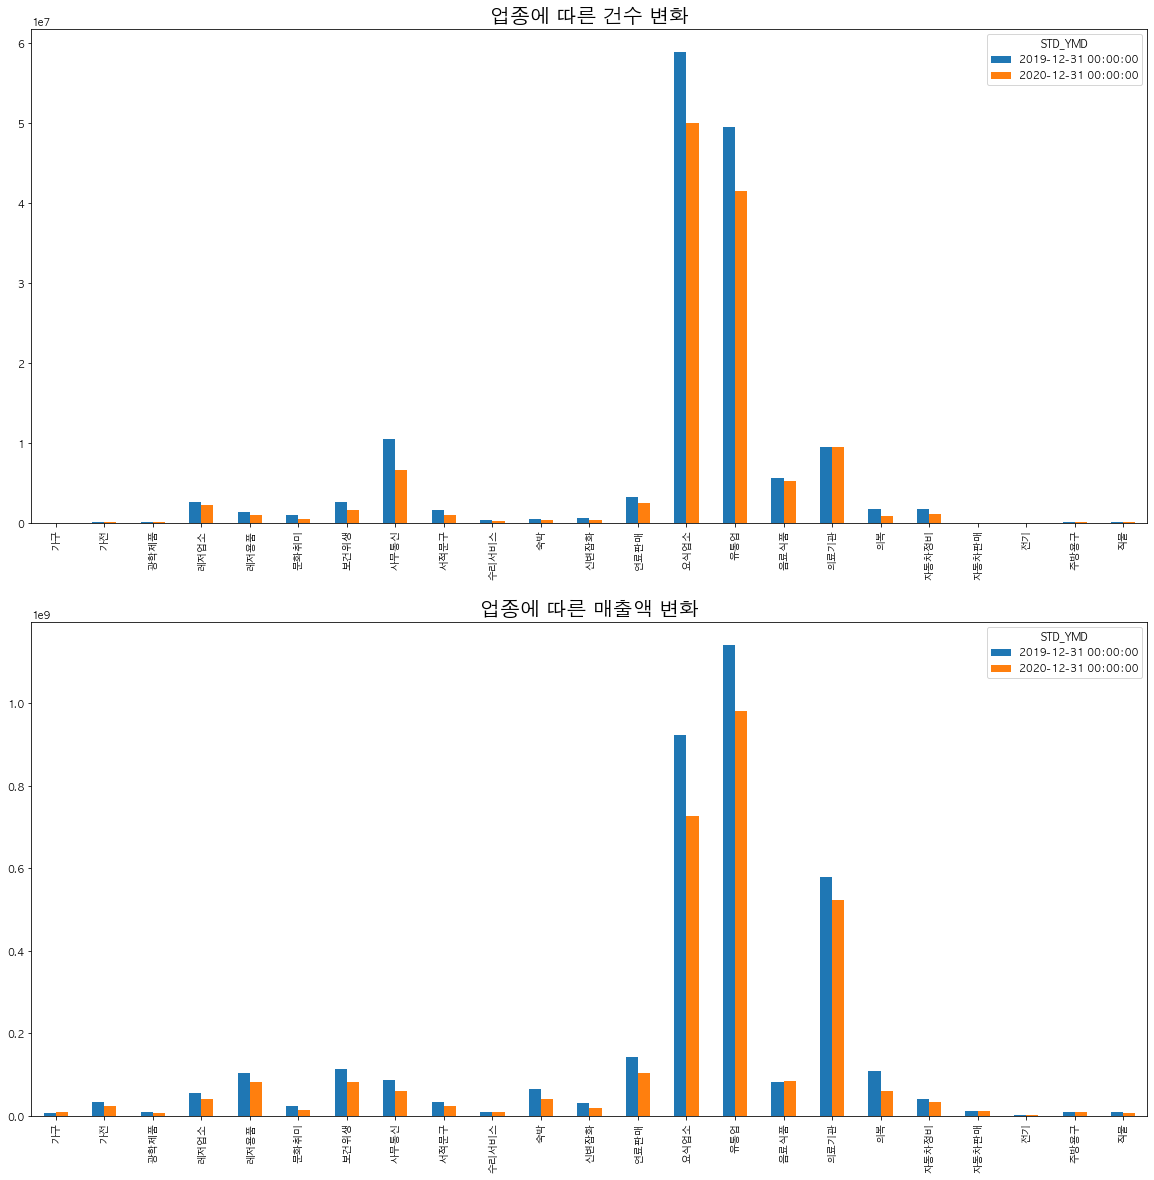

In [18]:
fig, ax = plt.subplots(2, 1, figsize = (20,20))
resid.set_index('STD_YMD').groupby([pd.Grouper(freq='Y'), 'UP_NM'])['USE_CNT'].sum()\
.unstack('UP_NM').T.plot.bar(ax= ax[0])
ax[0].set_title('업종에 따른 건수 변화', fontsize = 20)
ax[0].set_xlabel('')

resid.set_index('STD_YMD').groupby([pd.Grouper(freq='Y'), 'UP_NM'])['USE_AMT'].sum()\
.unstack('UP_NM').T.plot.bar(ax = ax[1])
ax[1].set_title('업종에 따른 매출액 변화', fontsize = 20)
ax[1].set_xlabel('')

plt.show()

## 지역별 카드 매출 데이터

In [19]:
amt = resid['USE_AMT'].groupby([resid['STD_YMD'], resid['GU_NM']]).sum().reset_index()
amt['DAY'] = amt['STD_YMD'].apply(lambda x: x.strftime('%A')[:3])
amt.index = amt.STD_YMD
amt = amt.drop('STD_YMD', axis = 1)
amt.head()

,GU_NM,USE_AMT,DAY
STD_YMD,,,
2019-02-01,대구 수성구,6716737,Fri
2019-02-01,대구 중구,5343958,Fri
2019-02-01,서울 노원구,8229490,Fri
2019-02-01,서울 중구,14315499,Fri
2019-02-02,대구 수성구,7833124,Sat


## 구에 따른 매출액

In [20]:
sj_amt = amt.query('GU_NM == "서울 중구"')
sn_amt = amt.query('GU_NM == "서울 노원구"')
dj_amt = amt.query('GU_NM == "대구 중구"')
ds_amt = amt.query('GU_NM == "대구 수성구"')

## 각 구마다의 2019, 2020년의 매출총액 시계열 추이

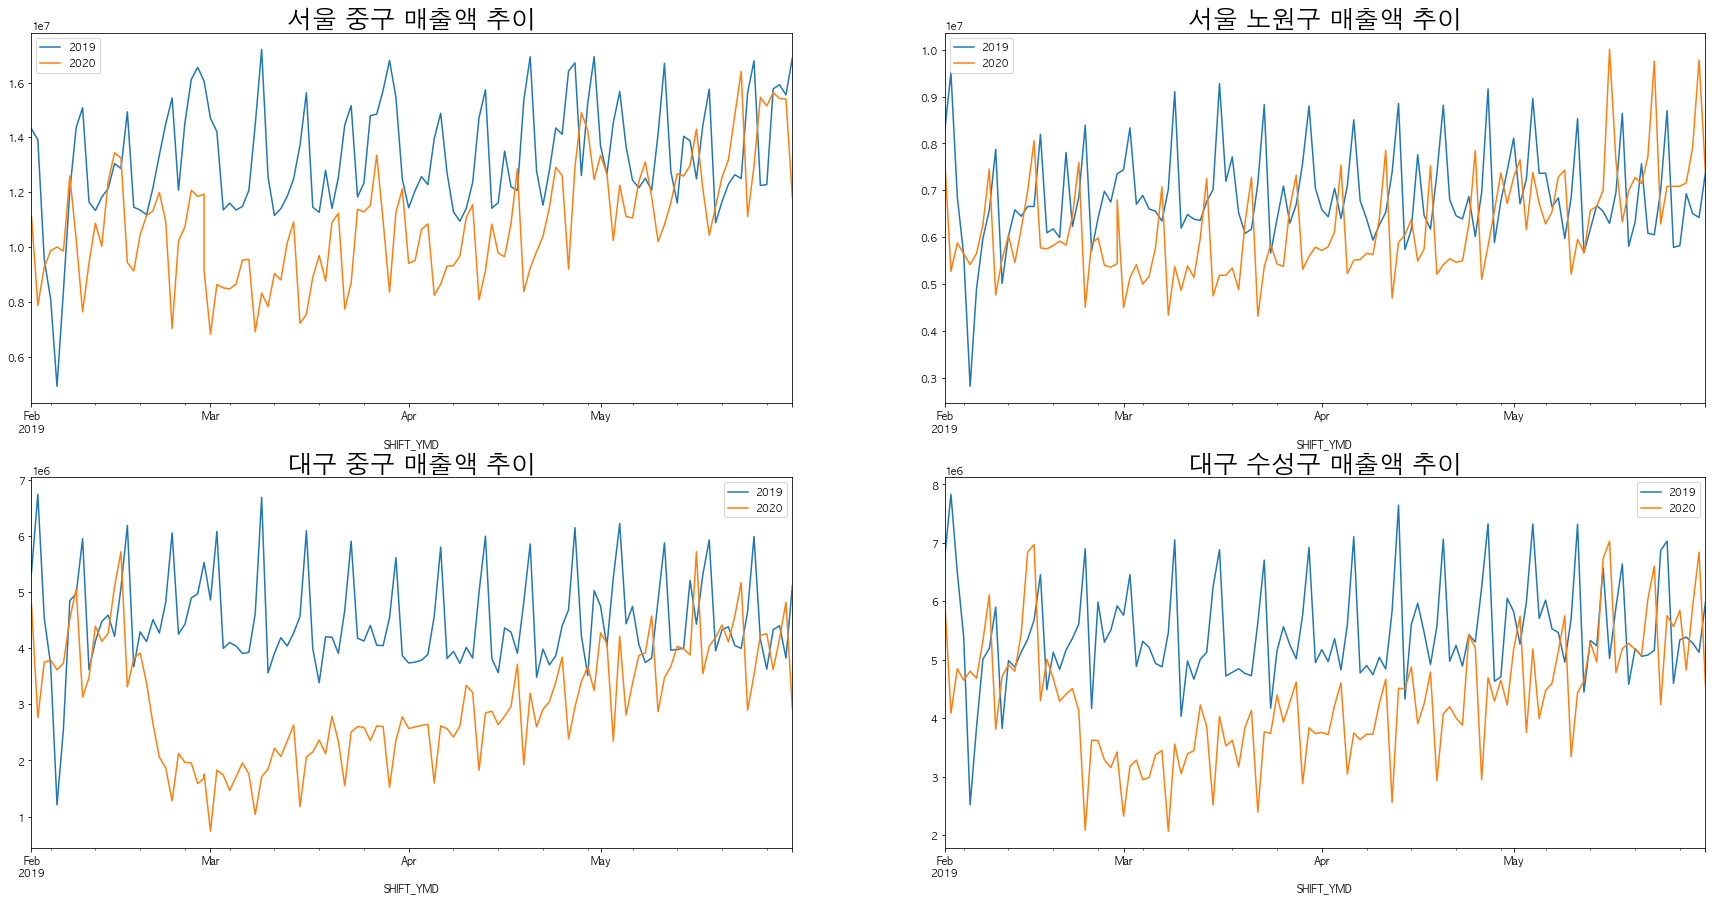

In [21]:
fig, ax = plt.subplots(2,2, figsize= (30, 15))

sj_amt['2019']['USE_AMT'].plot(label = '2019', ax = ax[0,0])
sj_amt['2020'].reset_index().assign(SHIFT_YMD = lambda x: x['STD_YMD'] - pd.DateOffset(years=1)) \
.set_index('SHIFT_YMD')['USE_AMT'].plot(label = '2020' ,ax = ax[0,0])
ax[0,0].set_title('서울 중구 매출액 추이', fontsize = 25)
ax[0,0].legend()

sn_amt['2019']['USE_AMT'].plot(label = '2019', ax = ax[0,1])
sn_amt['2020'].reset_index().assign(SHIFT_YMD = lambda x: x['STD_YMD'] - pd.DateOffset(years=1)) \
.set_index('SHIFT_YMD')['USE_AMT'].plot(label = '2020' ,ax = ax[0,1])
ax[0,1].set_title('서울 노원구 매출액 추이', fontsize = 25)
ax[0,1].legend()


dj_amt['2019']['USE_AMT'].plot(label = '2019', ax = ax[1,0])
dj_amt['2020'].reset_index().assign(SHIFT_YMD = lambda x: x['STD_YMD'] - pd.DateOffset(years=1)) \
.set_index('SHIFT_YMD')['USE_AMT'].plot(label = '2020' ,ax = ax[1,0])
ax[1,0].set_title('대구 중구 매출액 추이', fontsize = 25)
ax[1,0].legend()

ds_amt['2019']['USE_AMT'].plot(label = '2019', ax = ax[1,1])
ds_amt['2020'].reset_index().assign(SHIFT_YMD = lambda x: x['STD_YMD'] - pd.DateOffset(years=1)) \
.set_index('SHIFT_YMD')['USE_AMT'].plot(label = '2020' ,ax = ax[1,1])
ax[1,1].set_title('대구 수성구 매출액 추이', fontsize = 25)
ax[1,1].legend()

plt.show()

## 각 구의 요일별 매출액 총액

In [22]:
def visualize_days(data):
    days = {'Mon': '월요일', 'Tue': '화요일', 'Wed': '수요일',
        'Thu': '목요일', 'Fri': '금요일', 'Sat': '토요일', 'Sun': '일요일'}
    for i in days:
        fig, ax = plt.subplots(figsize = (15,4))

        data['2019'].query('DAY == @i').reset_index()['USE_AMT'].plot(label = '2019',marker = 'o', ax = ax)
        data['2020'].query('DAY == @i').reset_index()['USE_AMT'].plot(label = '2020',marker = 'o', ax = ax)

        plt.title(days.get(i))
        plt.xlabel('날짜')
        plt.ylabel('이용 금액(원)')

        plt.show()

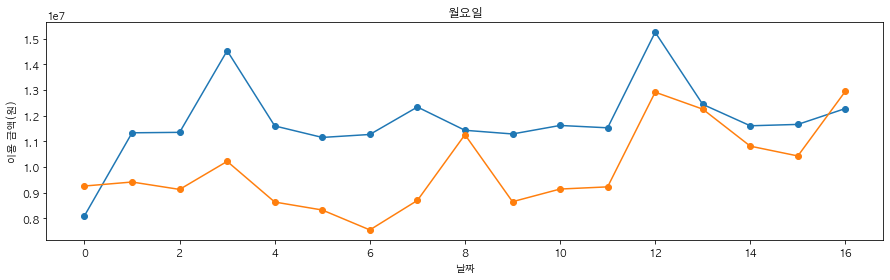

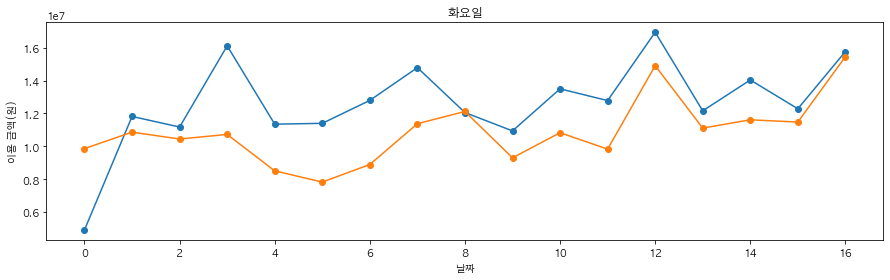

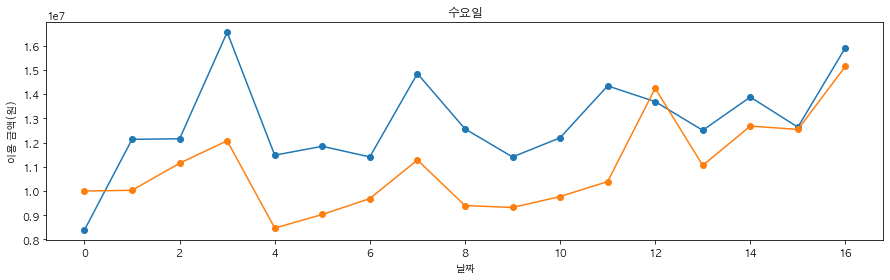

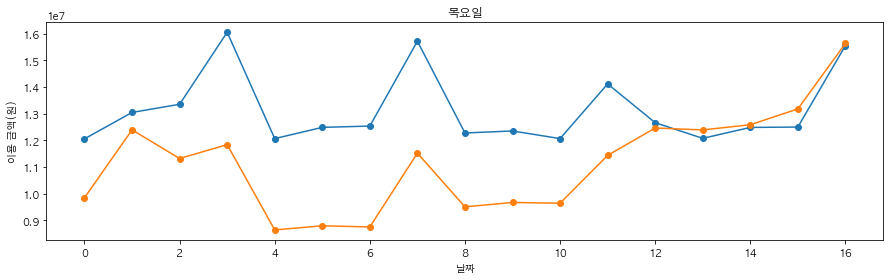

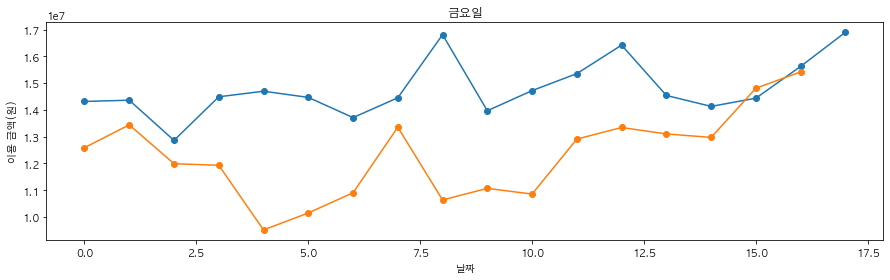

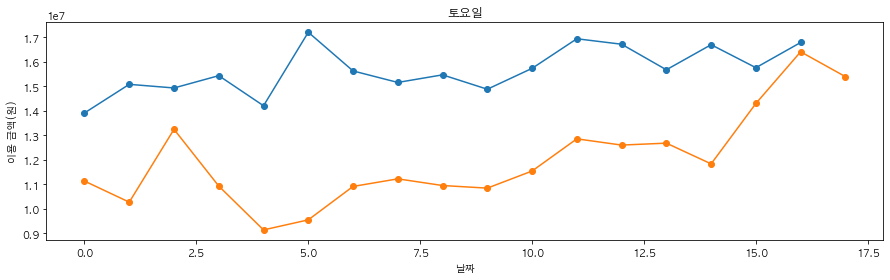

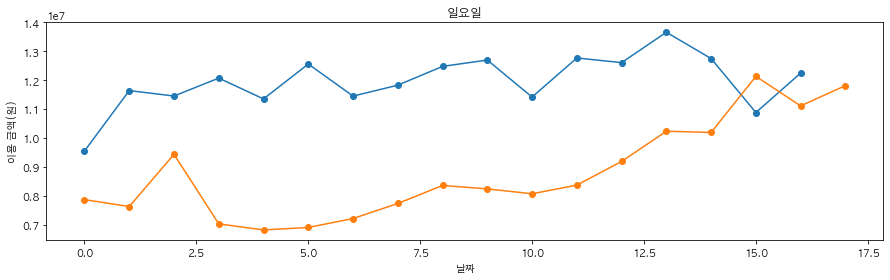

In [23]:
visualize_days(sj_amt)
#visualize_days(sn_amt)
#isualize_days(dj_amt)
#visualize_days(ds_amt)

 15주부터 2020년의 매출액이 2019년의 매출액보다 증가하는 모습을 보임